# 🧠 The Artifact Hunt (Application & Visual Analysis)

**Objective:**  
Visually identify and document the characteristic artifacts produced by the three main interpolation methods:  
- Nearest Neighbor (`cv2.INTER_NEAREST`)  
- Bilinear (`cv2.INTER_LINEAR`)  
- Bicubic (`cv2.INTER_CUBIC`)  

We will use two images:
- `Image1.jpg` → contains smooth areas (sky)
- `Image2.jpg` → contains sharp edges (building)

We will upscale an image by 5x and visually analyze how each interpolation method affects sharp edges and smooth areas.


## Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load both images
img_sky = cv2.imread("assets/Image1.jpg")
img_building = cv2.imread("assets/Image2.jpg")

# Convert to RGB for display
img_sky = cv2.cvtColor(img_sky, cv2.COLOR_BGR2RGB)
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)

# Upscale factor
scale_factor = 5

# Resize using three interpolation methods
methods = {
    "Nearest": cv2.INTER_NEAREST,
    "Bilinear": cv2.INTER_LINEAR,
    "Bicubic": cv2.INTER_CUBIC,
}

# Create upscaled versions for both images
resized_sky = {
    name: cv2.resize(
        img_sky, None, fx=scale_factor, fy=scale_factor, interpolation=method
    )
    for name, method in methods.items()
}
resized_building = {
    name: cv2.resize(
        img_building, None, fx=scale_factor, fy=scale_factor, interpolation=method
    )
    for name, method in methods.items()
}

### Visual Comparison — Smooth Image (Sky)

This image contains smooth gradients (e.g., sky), allowing us to observe:
- How each interpolation method handles **blurriness** or **color transitions**.
- Whether any method introduces visible banding or smoothing artifacts.


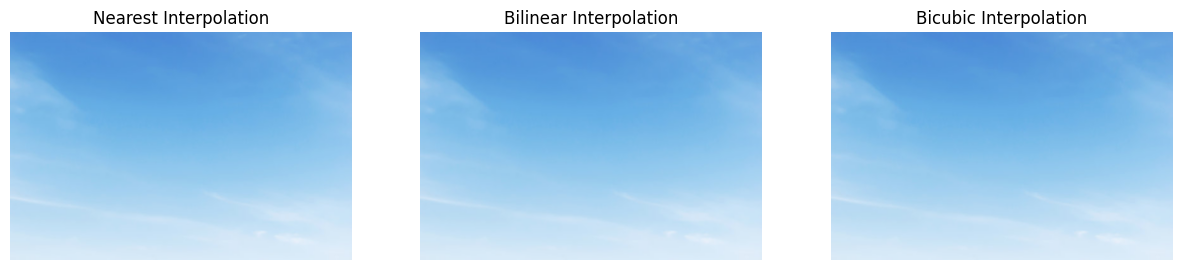

In [4]:
plt.figure(figsize=(15,5))
for i, (name, img) in enumerate(resized_sky.items()):
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(f"{name} Interpolation")
    plt.axis("off")
plt.show()

### Visual Comparison — Sharp Image (Building)

This image contains strong edges and fine details (e.g., windows, outlines, text).
We’ll examine:
- **Nearest Neighbor** → likely to show “stair-stepping” or blockiness.
- **Bilinear** → smoother edges but may lose detail.
- **Bicubic** → sharper results, possibly with *ringing artifacts* (haloing around edges).

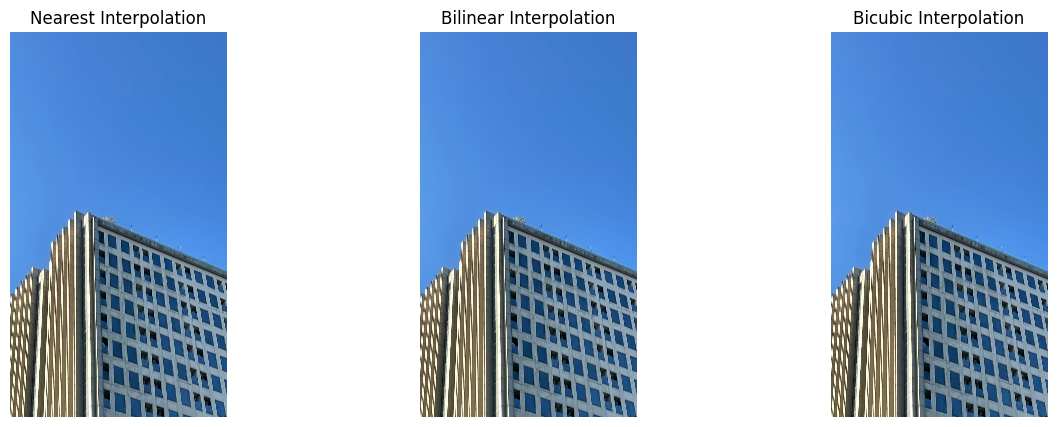

In [5]:
plt.figure(figsize=(15,5))
for i, (name, img) in enumerate(resized_building.items()):
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(f"{name} Interpolation")
    plt.axis("off")
plt.show()

## Artifact Analysis

| Property | Nearest Neighbor | Bilinear | Bicubic |
|-----------|------------------|-----------|----------|
| **Edges** | Blocky, stair-step pattern visible on diagonal or curved edges. | Smooth but slightly blurred edges. | Sharp and natural edges, but may show halo effects. |
| **Smooth Areas (Sky)** | Visible pixel blocks and abrupt color transitions. | Smooth transitions but a bit too soft. | Very natural look, retains texture well. |
| **Overall Look** | Harsh and pixelated. | Soft and balanced. | Sharp, high-quality but slower. |

**Observations:**
- Nearest Neighbor exaggerates edges with clear “steps” and blockiness.
- Bilinear smooths colors effectively but loses crispness.
- Bicubic provides the sharpest and most natural-looking results, sometimes overemphasizing contrast.

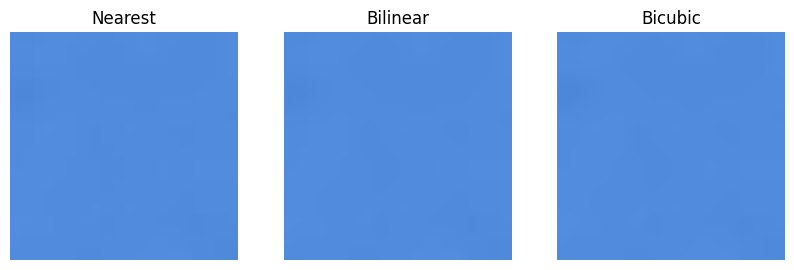

In [6]:
# Choose a region of interest from each (tweak x,y,w,h as needed)
x, y, w, h = 200, 200, 100, 100

# Crop from building (for edge details)
crops_building = {name: img[y:y+h, x:x+w] for name, img in resized_building.items()}

plt.figure(figsize=(10,3))
for i, (name, img) in enumerate(crops_building.items()):
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
plt.show()

### Artifact Observation Results

**1. Stair-stepping or Blockiness:**  
The **Nearest Neighbor** interpolation shows the most *stair-stepping* and *blockiness*.  
- Diagonal or curved edges (such as roof lines or text outlines) appear jagged and pixelated.  
- This happens because Nearest Neighbor simply copies the nearest pixel without blending, causing sharp “steps” instead of smooth transitions.  

**2. Blurriness or Mushiness in Smooth Areas:**  
The **Bilinear** interpolation produces the most noticeable *blurriness* in smooth regions such as the sky or skin tones.  
- It averages the colors of nearby pixels, which smooths gradients but also reduces texture and sharpness.  
- As a result, areas that should have slight tonal variation may look overly soft or “mushy.”  

**3. Sharper Edges and Ringing Artifacts:**  
In the **Bicubic** result, some edges (like building corners or window frames) appear slightly *sharper* than in the original.  
- However, this extra sharpness can introduce faint *ringing artifacts* — light or dark halos around high-contrast edges.  
- These halos are caused by the cubic interpolation curve overshooting when estimating pixel values near strong transitions.  

**Summary:**  
| Interpolation | Visible Effect | Description |
|----------------|----------------|--------------|
| **Nearest Neighbor** | Stair-stepping | Jagged edges, harsh transitions |
| **Bilinear** | Blurry / mushy | Softens gradients, loses detail |
| **Bicubic** | Sharper (haloing) | Enhanced detail but possible ringing artifacts |

**Conclusion:**  
Each method involves a quality trade-off:  
- *Nearest* is blocky but fast,  
- *Bilinear* is smooth but less detailed,  
- *Bicubic* is sharp and natural but can slightly overshoot around edges.

# ⚙️ Performance Profiling (Speed vs. Quality Trade-off)

**Objective:**  
Measure and compare the execution time of the three interpolation methods on a large image and analyze their trade-offs between speed and quality.

## Libraries

In [7]:
import time
import numpy as np

In [8]:
# Create a large synthetic image (2000x2000)
large_img = np.random.randint(0, 256, (2000, 2000, 3), dtype=np.uint8)
scale_factor = 3

# Measure execution times
start = time.time()
cv2.resize(large_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
t_nearest = (time.time() - start) * 1000  # in ms

start = time.time()
cv2.resize(large_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
t_bilinear = (time.time() - start) * 1000

start = time.time()
cv2.resize(large_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
t_bicubic = (time.time() - start) * 1000

print(f"Nearest Neighbor: {t_nearest:.2f} ms")
print(f"Bilinear: {t_bilinear:.2f} ms")
print(f"Bicubic: {t_bicubic:.2f} ms")

Nearest Neighbor: 22.05 ms
Bilinear: 14.57 ms
Bicubic: 31.68 ms


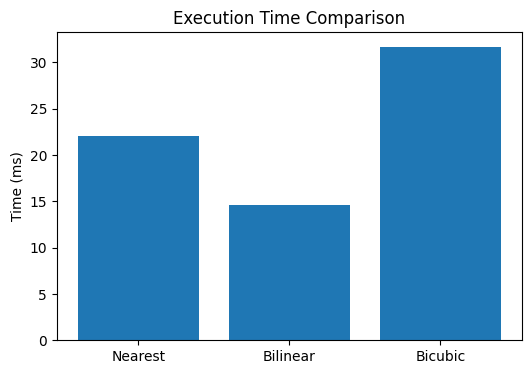

Bicubic is approximately 117.37% slower than Bilinear.


In [9]:
import matplotlib.pyplot as plt

methods = ['Nearest', 'Bilinear', 'Bicubic']
times = [t_nearest, t_bilinear, t_bicubic]

plt.figure(figsize=(6,4))
plt.bar(methods, times)
plt.ylabel('Time (ms)')
plt.title('Execution Time Comparison')
plt.show()

# Percentage difference
percent_slower = ((t_bicubic - t_bilinear) / t_bilinear) * 100
print(f"Bicubic is approximately {percent_slower:.2f}% slower than Bilinear.")

## Conclusion

- **Nearest Neighbor:** Samples only **1 pixel** → Fastest but lowest quality.  
- **Bilinear:** Samples **4 pixels** → Moderate quality and speed.  
- **Bicubic:** Samples **16 pixels** → Best quality but slowest.  

**Performance Insight:**  
The more pixels each interpolation method samples, the higher its computational cost.  
This results in smoother and sharper results but at the expense of processing time.  
In real-time applications, Bilinear often offers the best balance between speed and quality.